# Optimal Cutoff Rules

- finds the optimal bayes cut-off rules for the original experiment, as well as modified experiment (4 draws from A or B). 

In [1]:
# Calculate Bayes rule cutoffs for original game in paper
def conditionCheck(c,p):
    # Inputs: "p" is prior used (m/6 in the paper), "c" is cut-off rule tried. 
    # Outputs: True if posterior is greater than 0.5 or not, else false. 
    a = 2**c * (1/3)**6 * p # P(X=c|A) * P(A), X is number of Ns drawn. 
    b = 0.5**6 * (1-p) # P(X=c|B) * P(B)
    print(a/(a+b))
    return a/(a+b) >= 0.5 # P(A|X=c)>=0.5

P = [2/3,1/2,1/3]
C = [0,1,2,3,4,5,6]

for p in P:
    print(p)
    for c in C:
        print(c, conditionCheck(c,p))

0.6666666666666666
0.14935822637106178
0 False
0.2598984771573603
1 False
0.4125705076551167
2 False
0.5841414717626924
3 True
0.7374864962189411
4 True
0.8489119170984455
5 True
0.9182827037327654
6 True
0.5
0.08070617906683478
0 False
0.14935822637106178
1 False
0.25989847715736036
2 False
0.41257050765511677
3 False
0.5841414717626925
4 True
0.7374864962189412
5 True
0.8489119170984456
6 True
0.3333333333333333
0.04204993429697764
0 False
0.08070617906683476
1 False
0.14935822637106178
2 False
0.2598984771573603
3 False
0.4125705076551167
4 False
0.5841414717626924
5 True
0.7374864962189411
6 True


In [2]:
# Bayes Cutoffs
print(conditionCheck(3,2/3))
print(conditionCheck(4,1/2))
print(conditionCheck(5,1/3))

# 3 if m = 2
# 4 if m = 3
# 5 if m = 4

0.5841414717626924
True
0.5841414717626925
True
0.5841414717626924
True


In [3]:
# Calculate Bayes rule cutoffs for game with 4 draws w/0 replacement

def P_X_A(x):
    if x == 2:
        return 2/5
    elif x ==3:
        return 8/15
    elif x==4:
        return 1/15
    else:
        return 0
    
def P_X_B(x):
    if x == 1:
        return 1/5
    elif x ==2:
        return 3/5
    elif x==3:
        return 1/5
    else:
        return 0
    
def P_A_X(x,p):
    return (P_X_A(x)*p)/(P_X_A(x)*p+P_X_B(x)*(1-p))

for p in P:
    print(p)
    for x in [1,2,3,4]:
        print(f'Prior:{p},draw X:{x}, posterior P(A|X={x}):{P_A_X(x,p)}')

0.6666666666666666
Prior:0.6666666666666666,draw X:1, posterior P(A|X=1):0.0
Prior:0.6666666666666666,draw X:2, posterior P(A|X=2):0.5714285714285714
Prior:0.6666666666666666,draw X:3, posterior P(A|X=3):0.8421052631578948
Prior:0.6666666666666666,draw X:4, posterior P(A|X=4):1.0
0.5
Prior:0.5,draw X:1, posterior P(A|X=1):0.0
Prior:0.5,draw X:2, posterior P(A|X=2):0.4
Prior:0.5,draw X:3, posterior P(A|X=3):0.7272727272727272
Prior:0.5,draw X:4, posterior P(A|X=4):1.0
0.3333333333333333
Prior:0.3333333333333333,draw X:1, posterior P(A|X=1):0.0
Prior:0.3333333333333333,draw X:2, posterior P(A|X=2):0.25
Prior:0.3333333333333333,draw X:3, posterior P(A|X=3):0.5714285714285714
Prior:0.3333333333333333,draw X:4, posterior P(A|X=4):1.0


# Bayes Rule is Optimal Rule
- $X$: number of N observed
    - $X|A \sim BIN(2/3,6)$
    - $X|B \sim BIN(1/2,6)$
- $c \in \{0,1,2,3,4,5,6\}$: cutoff rule 

$c^*(p) = \text{argmax} E(Payment) = 10 * (P(X>c|A)+P(X\leq c|B))$



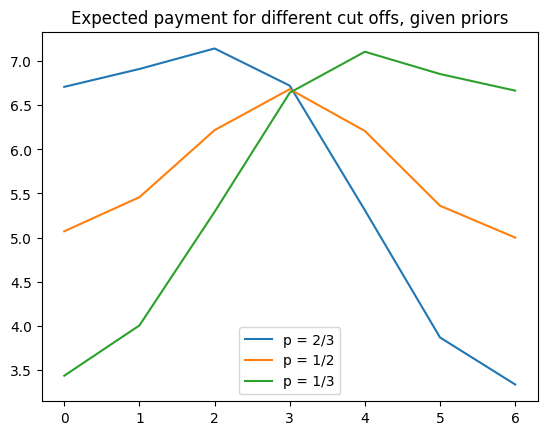

In [4]:
from scipy.stats import binom
def expPay(c, p):
    return 10 * (sum([binom.pmf(x,6,2/3) for x in range(c+1,7,1)])*p+sum([binom.pmf(x,6, 1/2) for x in range(0,c+1,1)])*(1-p))
    
graph = [expPay(c, 0.1) for c in range(0,7)]
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([expPay(c, 2/3) for c in range(0,7)], label = "p = 2/3")
plt.plot([expPay(c, 1/2) for c in range(0,7)], label = "p = 1/2")
plt.plot([expPay(c, 1/3) for c in range(0,7)], label = "p = 1/3")
plt.legend()
plt.title('Expected payment for different cut offs, given priors')
plt.show()